1 data clening

2 EDA

3 text preprocessing

4 model building

5 Evaluation

6 improvemment

7 website

8 deploy

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2195,ham,V-aluable. A-ffectionate. L-oveable. E-ternal....,NaN,NaN,NaN
4777,ham,U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R...,NaN,NaN,NaN
1538,ham,Midnight at the earliest,NaN,NaN,NaN
3971,ham,WOT U UP 2 J?,NaN,NaN,NaN
1009,ham,"Dear Hero,i am leaving to qatar tonite for an ...",NaN,NaN,NaN
593,ham,You still at grand prix?,NaN,NaN,NaN


In [ ]:
df.shape


(5572, 5)

# data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# last 3 columns have most null values and less non null i.e normalvalue so we are droping there three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2309,ham,"I have 2 sleeping bags, 1 blanket and paper an..."
1862,ham,The last thing i ever wanted to do was hurt yo...
2774,ham,"Dude u knw also telugu..thts gud..k, gud nyt.."
561,ham,Thanx 4 e brownie it's v nice...
2051,ham,Hey darlin.. i can pick u up at college if u t...


In [ ]:
df.isna().sum()

,0
v1,0
v2,0


In [ ]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3989,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
533,ham,I'll be late...
5506,ham,God's love has no limit. God's grace has no me...
1564,ham,Tmrw. Im finishing 9 doors
2477,ham,I'm done. I'm sorry. I hope your next space gi...


In [ ]:

# making target text in numbers
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing value check
df.isna().sum()

,0
target,0
text,0


In [ ]:
# drop duplicates
df=df.drop_duplicates(keep='first')


keep='first

“I want to delete repeated rows, but keep the first time each one appears.”

In [ ]:
df.shape

(5169, 2)

## 2 **EDA**

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

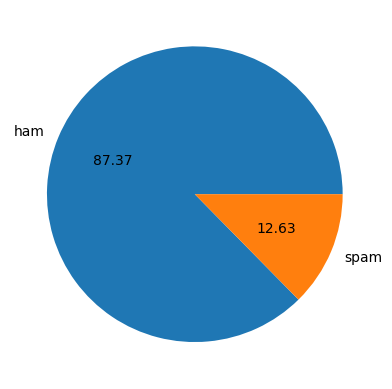

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show

In [ ]:

# data inbalance more ham less spam

In [ ]:
# now we are checking in message we will check how mnat alphabets how mabny words are being used
# numbes od sentanse in the essymess so using 'nltk

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['num_charecters']=df['text'].apply(len)
#.apply(len) = give the lengh i.e number od chareter usef in text col

In [ ]:

df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:

# numbers of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# it will convets sentense into word and nltk .words_tokenize will do that in
# it wil and then it will count it eg inn a sence thire are 15 wirds so it will count each word sepeateely as the num words =15 as 15 words in the sentaence



In [ ]:
df.head(3)

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [ ]:
# numbes of sentenses
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
# it will work like sentence in mesge will cout sencet by sentence by tolen-sen
# on besis ofsentace we breck the mesage or divide into small parts eg 3 sencence in the message it will count as 3 only

In [ ]:
df.head(3)

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [ ]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target'] == 0][['num_charecters','num_words','num_sentences']].describe()


,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_charecters', ylabel='Count'>

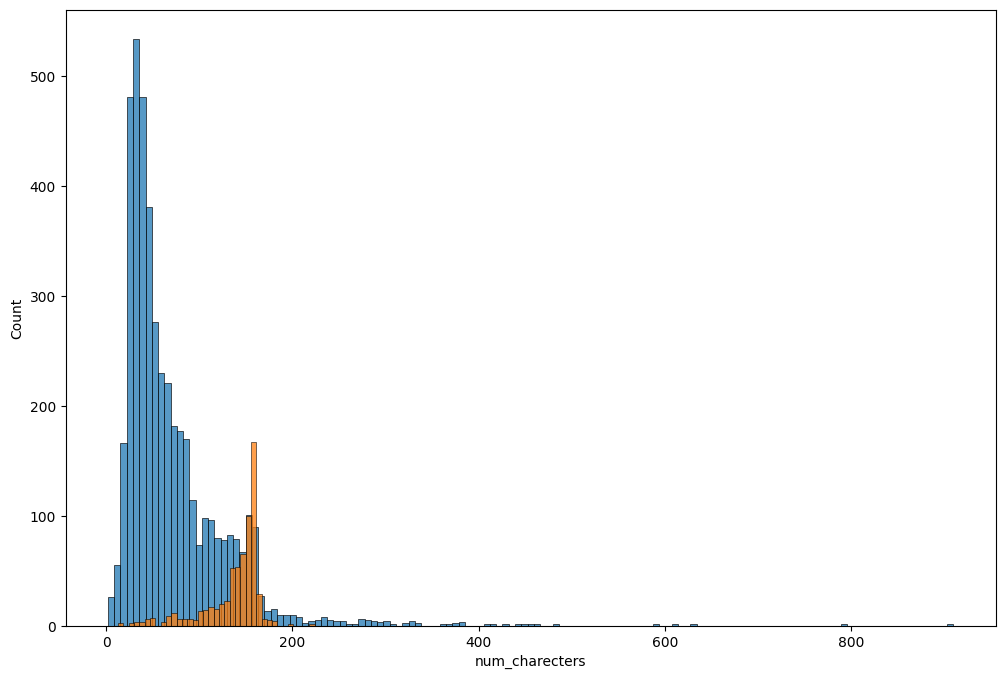

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'])

<Axes: xlabel='num_words', ylabel='Count'>

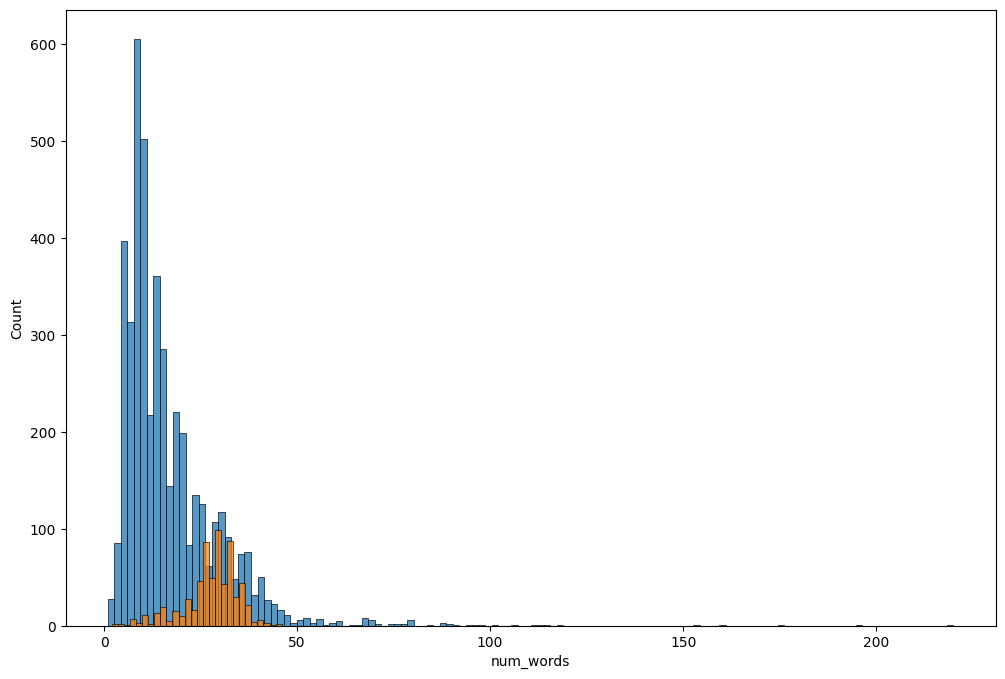

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

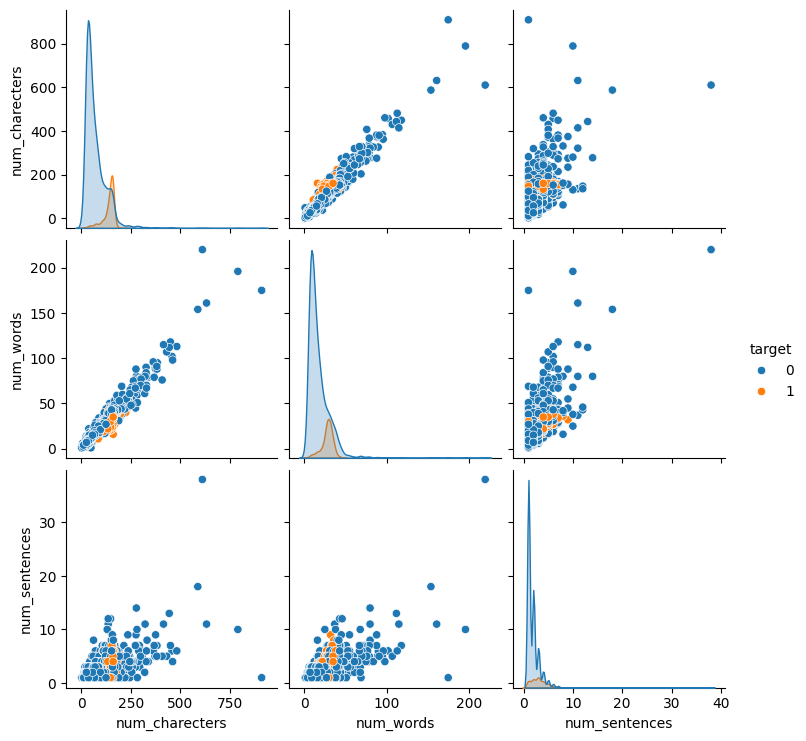

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   num_charecters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


<Axes: >

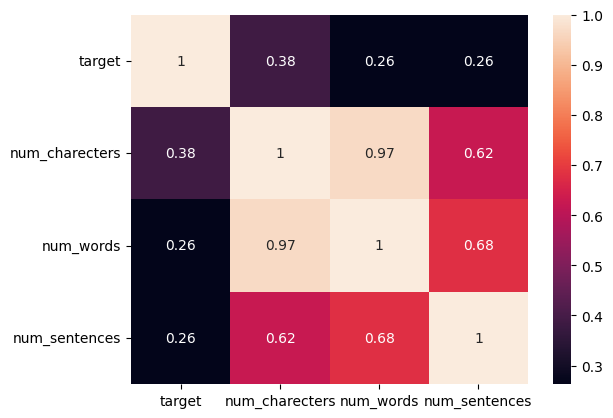

In [ ]:
sns.heatmap(df[['target','num_charecters','num_words','num_sentences']].corr(),annot=True)

we will keep num_charector relationship with target it have corelation=0.38 more than 0.26,0.26 and other columns have very steon ewaltion with each other

## **Data** **Preprocessing**
 data preprocessing on text data

 lower case --- change text data into lower case


 tokenization --- breack data into small words

 removing special charectors



 removing stop words and punctuation
 the, is, in, at, of, for, and, a, to, if, on...

 📌 2. Punctuation = Characters like . , ! ? ; : " ( )

stemming


Stemming is the process of reducing words to their root or base form, usually by chopping off prefixes or suffixes. runing -- run



In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

Example:    if i.isalnum():


Input:
"Hi! This is @chatgpt123."

Keep only alphanumeric characters:
"HiThisischatgpt123"

In [ ]:
 transform_text('HI HOW ARE YOU 20% learning maching')

'hi 20 learn mach'

In [ ]:
# stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
#ps.stem('loving') = love

In [ ]:
df['transform_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# word cloud will make important  word big

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
span_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

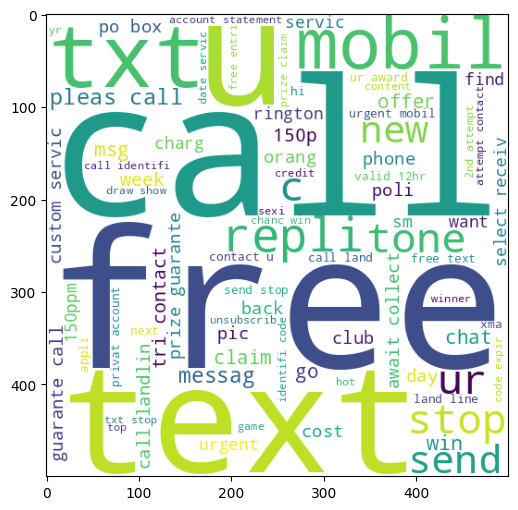

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(span_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

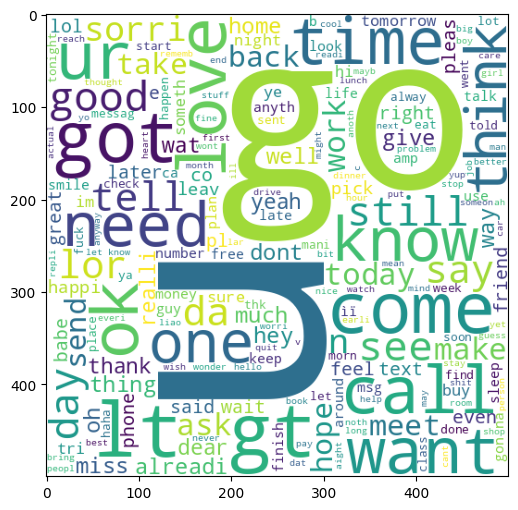

In [ ]:

plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
# top 30 wors of ham and spam
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
   for word in msg.split():
        spam_corpus.append(word)



In [ ]:
len(spam_corpus)

9939

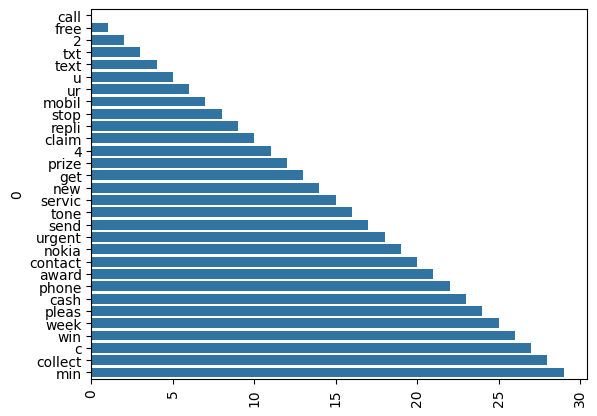

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# top 30 wors of ham
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
   for word in msg.split():
        ham_corpus.append(word)



In [ ]:
len(ham_corpus)

35404

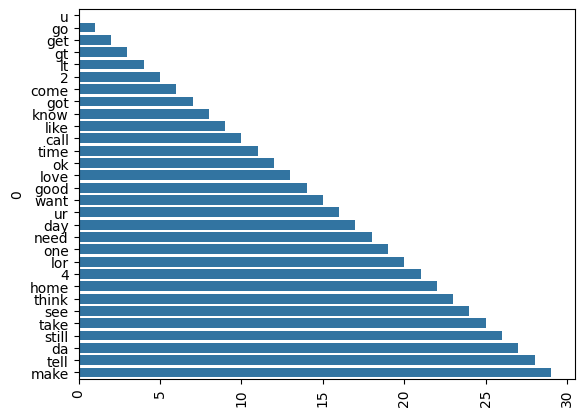

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# on textual data naive baysed work good than other model

# **model** **building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [ ]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [ ]:
# x=cv.fit_transform(df['transform_text']).toarray()
x=tfidf.fit_transform(df['transform_text']).toarray()


In [ ]:
x.shape

(5169, 6708)

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# as we dont know which nave bayes type should use here


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:

mnb.fit(x_train,y_train)

y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))  # data is inbalance so we  will
print(precision_score(y_test,y_pred2))    # depend on precision score

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:

bnb.fit(x_train,y_train)

y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# tfidf=TfidfVectorizer() now checking this and find which give better presion score

In [ ]:
tfidf=TfidfVectorizer()

In [ ]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [ ]:
y=df['target'].values

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:

mnb.fit(x_train,y_train)

y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))  # data is inbalance so we  will
print(precision_score(y_test,y_pred2))    # depend on precision score
# here presion score is perfect

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:

bnb.fit(x_train,y_train)

y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


 now here we see thta precision score is more imp here as the dat is in balce so we will depend on presion data  more so

here we notice TfidfVectorizer score of MultinomialNB precison score is 1.0 is perfect so we will take tfidvectorizer as answer

In [ ]:
# ifidf mnb selected

In [ ]:
# saving model

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))